In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('paper')

In [8]:
# Load data
df = pd.read_csv('./data/plain_run.csv')
df_jpeg = pd.read_csv('./data/jpeg.csv')

df['file_size_jpeg'] = df_jpeg['file_size_transcoded']
df['compression_ratio_jpeg'] = df['file_size_transcoded'] / df['file_size_jpeg']

df

,file_name,file_size_original,file_size_transcoded,compression_ratio,transcoding_time,file_size_jpeg,compression_ratio_jpeg
0,test_small,974331,4533948,4.653396,1411,39110,115.928100
1,test_pixel,7649,68090,8.901817,159,155999,0.436477
2,test_detail_low,345237,3526027,10.213352,1126,642346,5.489295
3,test_tiny,245004,1207041,4.926618,309,2559562,0.471581
4,test_color,502888,2811228,5.590167,1033,85805,32.762986
5,test_fine_print,30956,659,0.021288,235,131051,0.005029
6,test_large,14784572,52259864,3.534757,19635,3804,13738.134595
7,test_detail_high,785610,3602062,4.585051,1169,18179,198.144122
8,test_gradient,142670,36116,0.253144,85,54502,0.662655
9,test_black_white,331351,2748058,8.293495,969,61321,44.814305


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


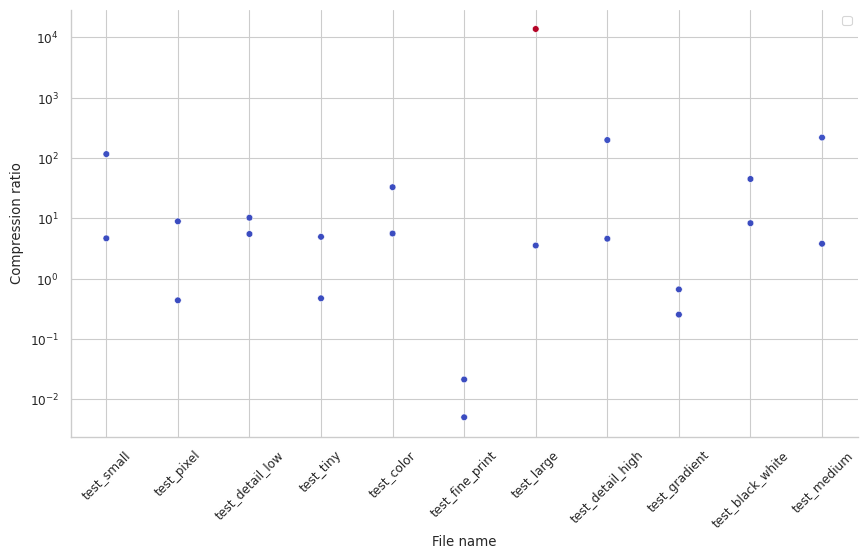

In [24]:
# Compression ratio
df_sorted = df.sort_values('compression_ratio')


# Concatenate data frames
df_concat = pd.concat([df[['file_name', 'compression_ratio']], 
                       df[['file_name', 'compression_ratio_jpeg']].rename(columns={'compression_ratio_jpeg': 'compression_ratio'})])

# Create a visualization
g = sns.relplot(
    x='file_name',
    y='compression_ratio',
    data=df_concat,
    hue='compression_ratio',
    palette='coolwarm',
    aspect=16/9,
    legend=None
)

g.set(xlabel='File name', ylabel='Compression ratio', yscale='log')

plt.xticks(rotation=45)

# Add legend
handles, labels = g.ax.get_legend_handles_labels()
g.ax.legend(handles=handles[::len(df_concat)//2], 
            labels=[f'{label:.2f}' for label in labels[::len(df_concat)//2]])

# plt.legend()

plt.xticks(rotation=45)

plt.show()


# Create a visualization
#g = sns.relplot(
#    x='file_name',
#    y='compression_ratio',
#    data=df_sorted,
#    aspect=16/9,
#    label='Plain'
#)

#g.set(xlabel='File name', ylabel='Compression ratio')# , yscale='log', yticks=ticks, yticklabels=ticks)

#plt.xticks(rotation=45)

#plt.show()


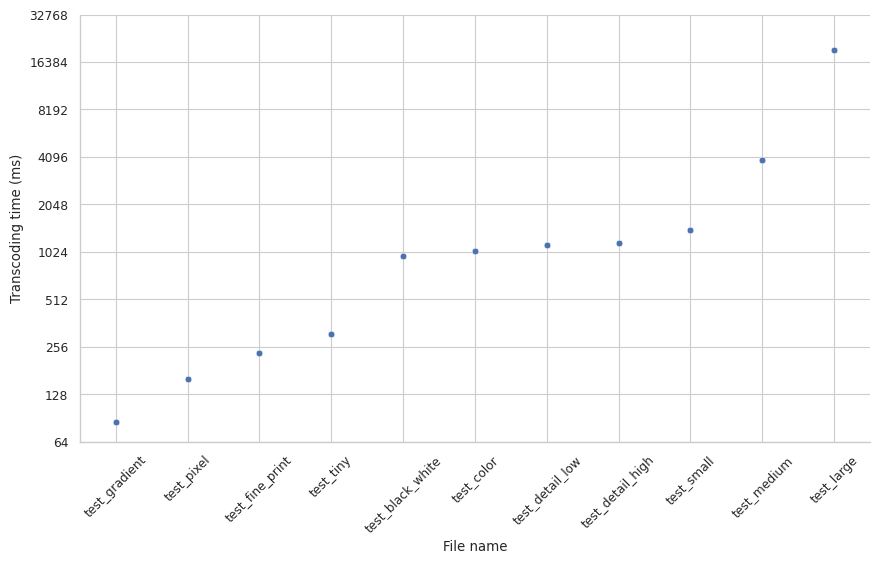

In [7]:
# Transcoding time
df_sorted = df.sort_values('transcoding_time')

# Create a visualization
g = sns.relplot(
    x='file_name',
    y='transcoding_time',
    # yscale='log',
    data=df_sorted,
    # height=5,
    aspect=16/9
)

ticks = [2**x for x in range(6, 16)]
g.set(xlabel='File name', ylabel='Transcoding time (ms)',
      yscale='log', yticks=ticks, yticklabels=ticks)

plt.xticks(rotation=45)

plt.show()